## 데이터 laod

In [4]:
import numpy as np
import pandas as pd

#index_col=0 : 인덱스를 불러오지 않음
movie=pd.read_csv("naver_movie_points_2022.csv", index_col=0)
movie.tail()

,date,name,point
919,2022-02-14,경관의 피,7.35
920,2022-02-14,해리 포터와 불사조 기사단,7.03
921,2022-02-14,나의 촛불,6.78
922,2022-02-14,웨스트 사이드 스토리,6.58
923,2022-02-14,해적: 도깨비 깃발,6.22


### 평점 합산

In [7]:
#영화 이름을 인덱스, 점수 합산 후 내림차순 10개를 출력
movie_unique=pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_unique.sort_values('point', ascending=False).head(10)

,point
name,
스파이더맨: 노 웨이 홈,400.73
씽2게더,377.09
러브레터,364.80
킹스맨: 퍼스트 에이전트,364.07
프렌치 디스패치,359.62
드라이브 마이 카,344.41
경관의 피,311.10
아멜리에,281.92
특송,270.27


## DataFrame Query로 검색

In [12]:
movie.query('name==["씽2게더"]')

,date,name,point
91,2022-01-06,씽2게더,9.41
110,2022-01-07,씽2게더,9.37
130,2022-01-08,씽2게더,9.40
150,2022-01-09,씽2게더,9.42
168,2022-01-10,씽2게더,9.40
186,2022-01-11,씽2게더,9.39
204,2022-01-12,씽2게더,9.40
220,2022-01-13,씽2게더,9.40
237,2022-01-14,씽2게더,9.41
257,2022-01-15,씽2게더,9.43


## 날짜별 영화 평점 변화 그리기
- 영화 씽2게더의 평점 변화를 확인

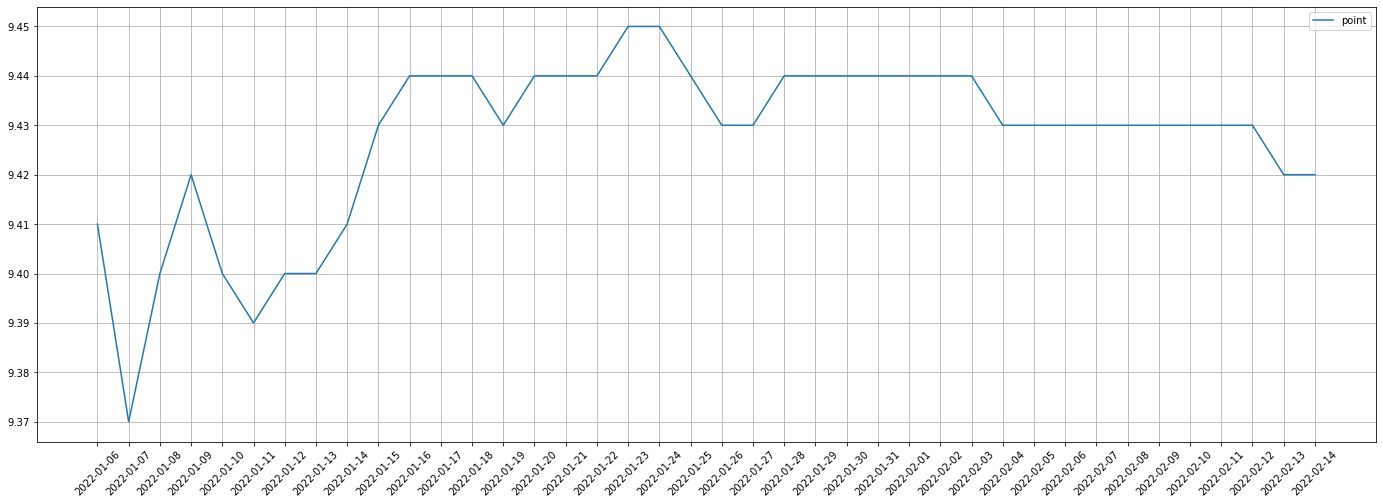

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))
plt.plot(movie.query('name==["씽2게더"]')['date'],
        movie.query('name==["씽2게더"]')['point'])
plt.legend(labels=['point'])

#x축의 길이가 너무 길어서 rotation을 45로 해줌
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 영화 정리
- 크롤링한 영화를 컬럼으로 하게 pivot함

In [14]:
movie_pivot=movie.pivot_table(movie, index='date', columns=['name'])
movie_pivot.columns=movie_pivot.columns.droplevel([0])
movie_pivot.tail()

name,경관의 피,고양이를 부탁해,공각기동대,귀향,그녀에게,기쿠지로의 여름,나쁜 교육,나의 촛불,나일 강의 죽음,단지 세상의 끝,...,킹스맨: 퍼스트 에이전트,타오르는 여인의 초상,태일이,특송,"틱, 틱... 붐!",프렌치 디스패치,하우스 오브 구찌,해리 포터와 불사조 기사단,해적: 도깨비 깃발,해피 뉴 이어
date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,7.37,NaN,NaN,8.68,NaN,NaN,8.46,NaN,8.50,NaN,...,8.05,9.05,NaN,7.85,NaN,7.98,7.92,7.03,6.22,NaN
2022-02-11,7.36,NaN,NaN,8.68,NaN,NaN,8.46,6.76,8.43,7.49,...,8.03,9.05,NaN,7.84,NaN,7.98,7.92,7.03,6.22,NaN
2022-02-12,7.35,NaN,NaN,8.68,NaN,NaN,8.46,7.00,8.24,7.49,...,8.01,9.05,NaN,7.83,NaN,7.98,7.92,7.03,6.21,NaN
2022-02-13,7.35,NaN,NaN,8.68,NaN,NaN,8.46,6.99,8.06,7.49,...,8.00,9.05,NaN,7.81,NaN,7.98,7.92,7.03,6.22,NaN
2022-02-14,7.35,NaN,NaN,8.68,NaN,NaN,NaN,6.78,7.97,7.49,...,7.99,9.05,NaN,7.80,NaN,7.99,7.91,7.03,6.22,NaN


## 보고싶은 영화 평점 시각화

In [15]:
movie_pivot.columns

Index(['경관의 피', '고양이를 부탁해', '공각기동대', '귀향', '그녀에게', '기쿠지로의 여름', '나쁜 교육',
       '나의 촛불', '나일 강의 죽음', '단지 세상의 끝', '더 헌트', '덩케르크', '돈 룩 업', '듄',
       '드라이브 마이 카', '디어 에반 핸슨', '라스트 나잇 인 소호', '램', '러브 액츄얼리', '러브레터',
       '레지던트 이블: 라쿤시티', '마미', '매트릭스: 리저렉션', '베놈 2: 렛 데어 비 카니지',
       '불한당: 나쁜 놈들의 세상', '스파이더맨: 노 웨이 홈', '스파이럴', '씽2게더', '아멜리에', '아웃레이지',
       '어나더 라운드', '엔칸토: 마법의 세계', '연애 빠진 로맨스', '웨스트 사이드 스토리', '유체이탈자', '이터널스',
       '장민호 드라마 최종회', '캐롤', '코다', '킹메이커', '킹스맨: 퍼스트 에이전트', '타오르는 여인의 초상',
       '태일이', '특송', '틱, 틱... 붐!', '프렌치 디스패치', '하우스 오브 구찌', '해리 포터와 불사조 기사단',
       '해적: 도깨비 깃발', '해피 뉴 이어'],
      dtype='object', name='name')

C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50493 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50493 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\taeeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45908 missing from curre

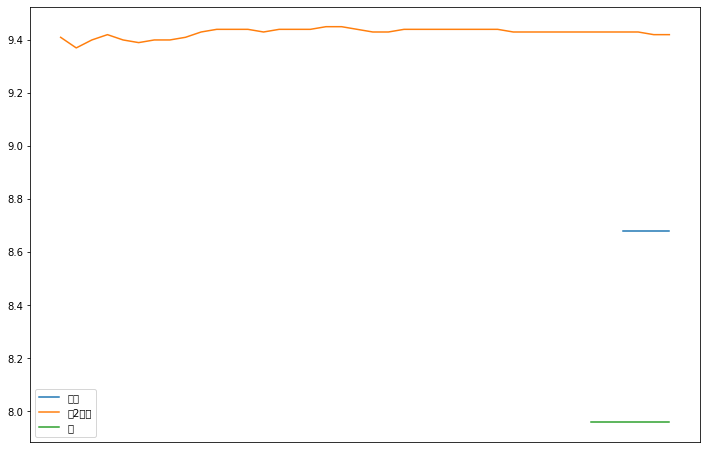

In [19]:
targer_col=['마미', '씽2게더', '듄']

plt.figure(figsize=(12,8))
plt.plot(movie_pivot[targer_col])
plt.legend(targer_col, loc='best')
plt.tick_params(bottom=False, labelbottom=False)
plt.show()